# 1) Problem statement.


1.This dataset comprises 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the 
northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2.Can get insights from the dataset to know which features have contributed more in predicting Forest fire

# 2) Data Collection.


1.Dataset used in this particular problem statements was a dataset on Algerian Forest Fires
2.The Dataset contain data from June 2012 to September 2012.
3.Each dataset contain 122 rows and 14 columns

#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# import dataset

In [275]:
df=pd.read_csv("C:\Algerian_forest_fires_dataset_UPDATE.csv")

# Feature Information

Algerian Forest Fires:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws : Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8

FWI Components:

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

Show Top 5 Records

In [276]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Shape of the dataset

In [277]:
df.shape

(247, 14)

Summary of the dataset

In [278]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


Check Datatypes in the dataset

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [280]:
#adding the region
df['Region']=[1 if i<121 else 0 for i in df.index]

In [281]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [282]:
#droping the year column 
df.drop(['year'],axis=1,inplace=True)

In [283]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
243,27,9,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
244,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
245,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


# Data cleaning

In [284]:
df.isnull().sum()

day            1
month          2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [285]:
df[df.isnull().any(axis=1)]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
168,14,7,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,0


In [286]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [287]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 14)

In [288]:
# Column which has string
df.iloc[[122]]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [289]:
df[df.duplicated()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [290]:
#remove 122th column
df = df.drop(122).reset_index(drop=True)



In [291]:
df.isnull().sum()

day            0
month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

checking data types of each column and change it correctly

In [292]:
df.dtypes

day            object
month          object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [293]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

 To fix Spaces in the column names

In [294]:

df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

 To change and correct data types

In [295]:
df[['day','month','Temperature','RH','Ws']]=df[['day','month','Temperature','RH','Ws']].astype('int')


In [296]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)       


In [297]:
df.dtypes

day              int32
month            int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [298]:
df.astype(str)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [385]:
df["Classes"]=df["Classes"].str.replace("not fire","1")
df["Classes"]=df["Classes"].str.replace("fire","0")
df["Classes"]=df["Classes"].astype(int)

In [386]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,2
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,2
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,2
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,2


# 3.Exploring data

In [387]:
# define numerical & categorical columns
categorical_features = [i for i in df.columns if df[i].dtypes == 'object']
numeric_features = [i for i in df.columns if df[i].dtypes != 'object']
print(categorical_features)
print(numeric_features)

[]
['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


# Univariate Analysis

# The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysisis to understand the distribution of values for a single variable.

# numerical columns

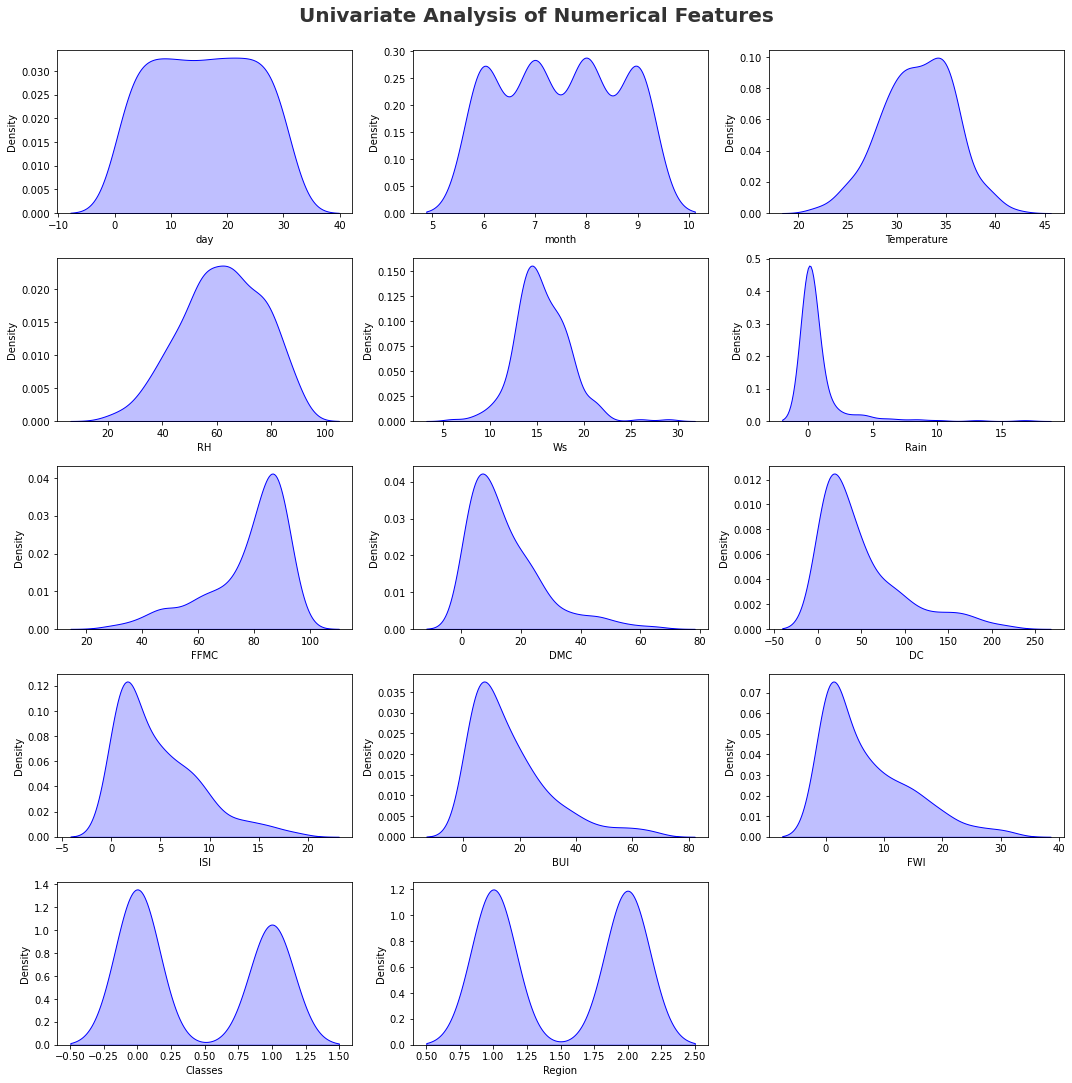

In [388]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Report

* Temperature,RS,Ws are normally distributed.
* FFMC is right skewed.
* Rain,DMC,DC,ISI,BUI,FWI are left skewed or negatively skewed.

# categorical analysis

<AxesSubplot:xlabel='Classes', ylabel='count'>

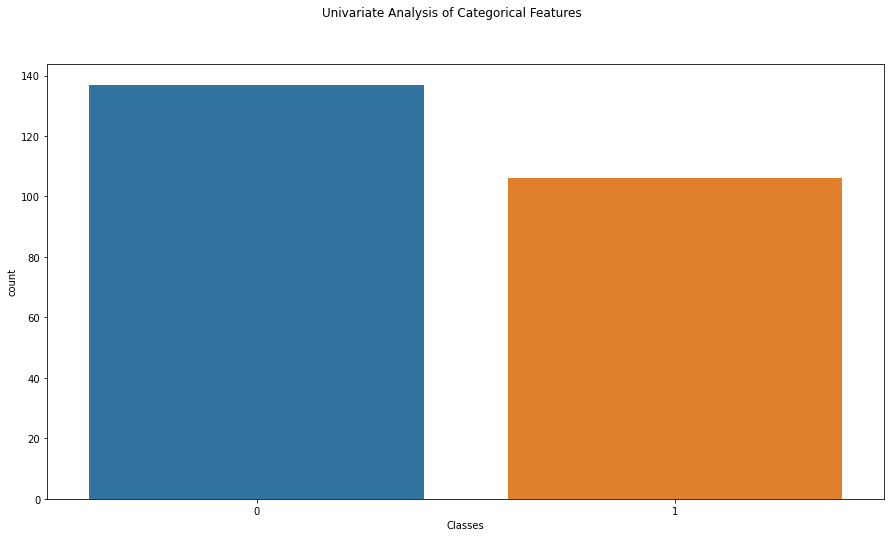

In [389]:

plt.suptitle('Univariate Analysis of Categorical Features')
sns.countplot(x=df['Classes'])
    

Report

from the plot we can observe that fire has occured many times

# Bivariate analysis

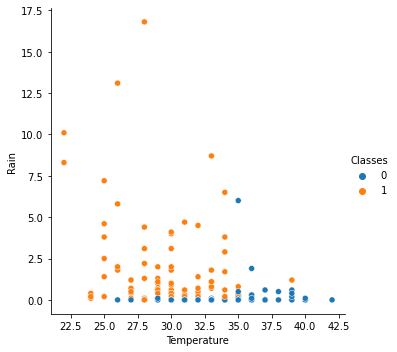

In [390]:
sns.relplot(x='Temperature',y='Rain',data=df,hue='Classes')

# Multivariate analysis

In [391]:
#Multivariate analysis is the analysis of more than two variable.

Check Multicollinearity in Numerical features

In [392]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197


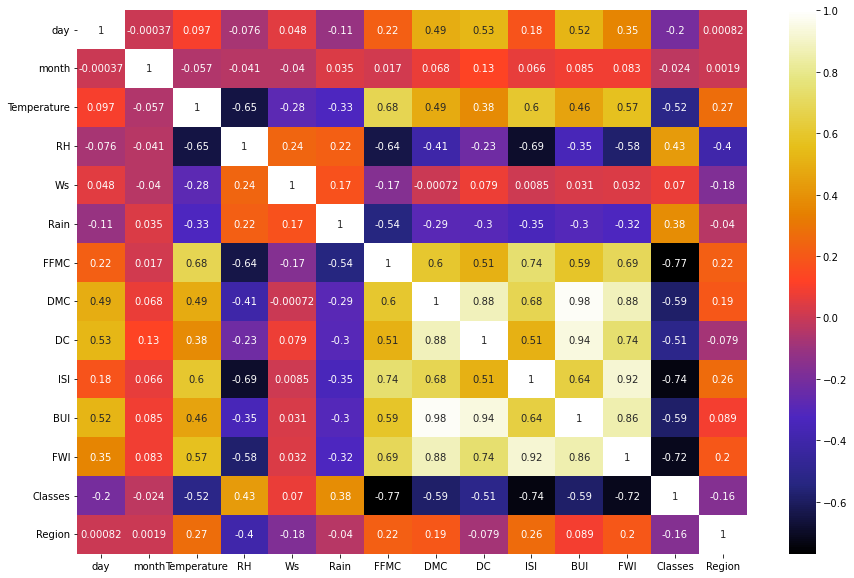

In [393]:

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

# Observation

1.DMC-BUI,DC-BUI,FWI-BUI are very high correlated.

2.FFMC-BUI,ISI-BUI,DC-ISI are high correlated

3.Range between 0.4 to 0.6 are moderate correlated

4.correlation coefficients between 0.2 to 0.4 are less correlated

5.correlation coefficients between 0 to .1 are negatively correlated

# Boxplot to find outliers in the features

<AxesSubplot:>

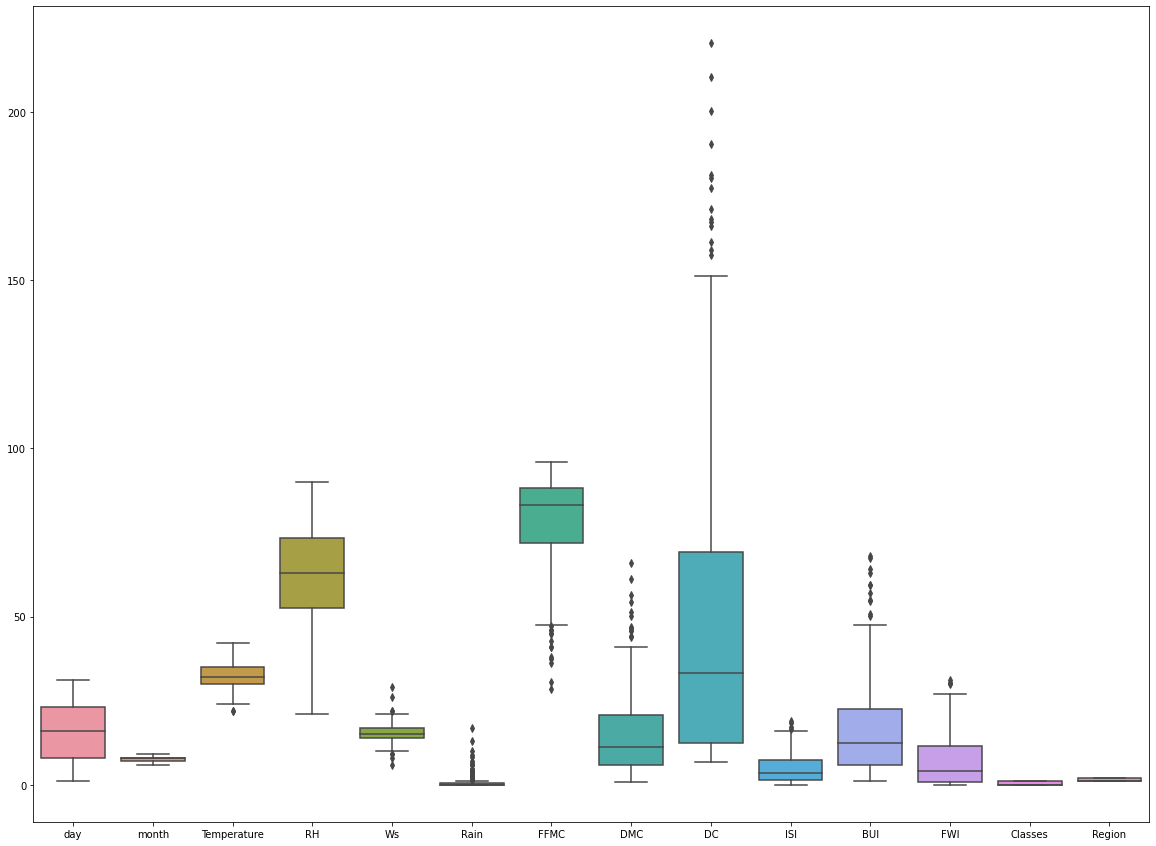

In [394]:

from matplotlib import rcParams
rcParams['figure.figsize']=20,15
sns.boxplot(data=df)

Observation

* With the help of boxplot figure we can see that some outliers are present in data

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

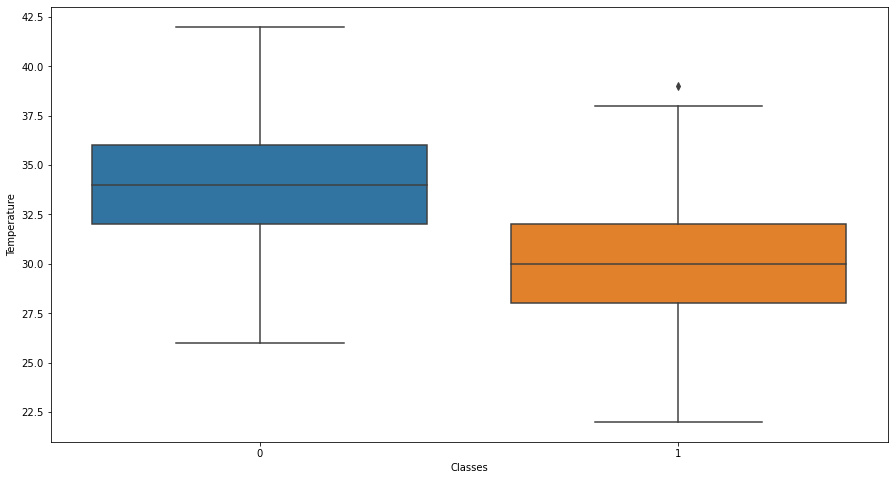

In [395]:

rcParams['figure.figsize']=15,8
sns.boxplot(x='Classes',y='Temperature',data=df)

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

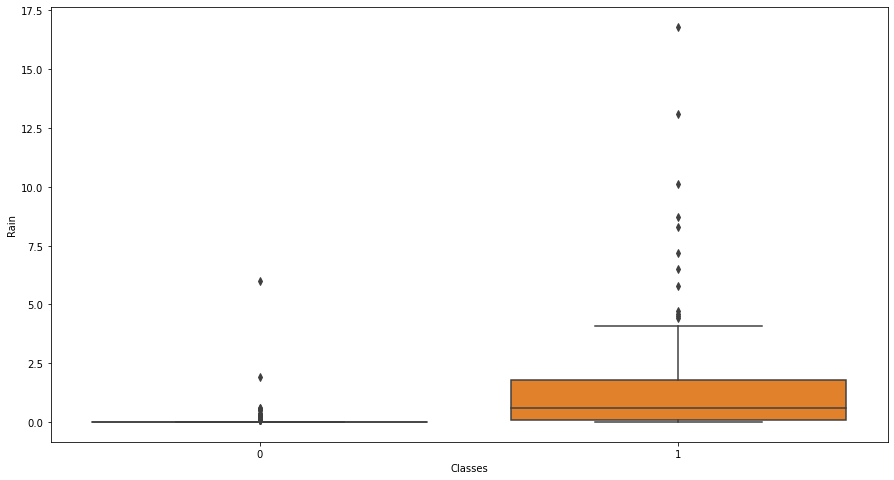

In [396]:

from matplotlib import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x='Classes',y='Rain',data=df)

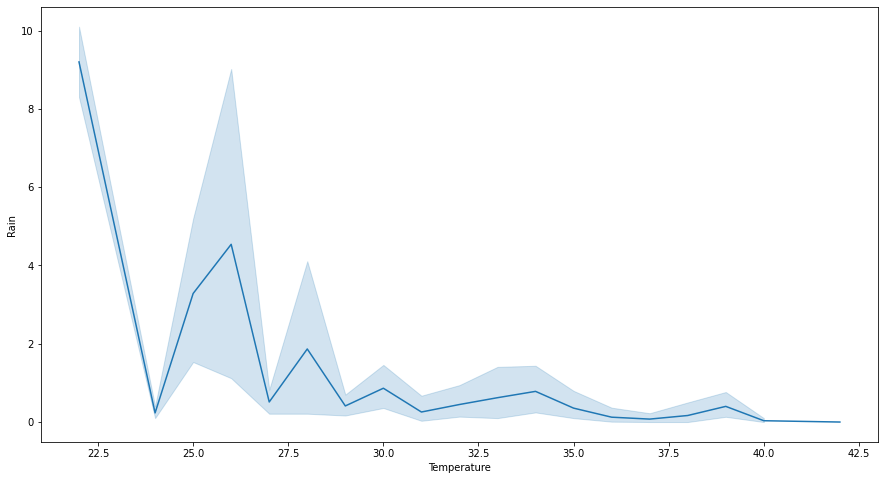

In [397]:

from matplotlib import rcParams
rcParams['figure.figsize']=15,8
p=sns.lineplot(x='Temperature',y='Rain',data=df)


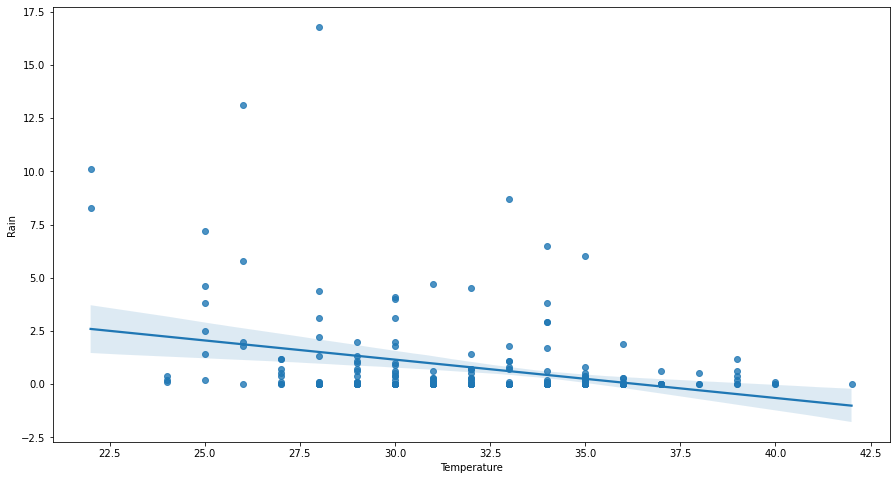

In [398]:
rcParams['figure.figsize']=15,8
p=sns.regplot(x='Temperature',y='Rain',data=df)

# Splitting Training and Testing data

In [399]:
#independent and dependent features
X=df.iloc[:,df.columns!='Temperature']
y=df.iloc[:,2]

In [400]:
y

0      29
1      29
2      26
3      25
4      27
       ..
238    30
239    28
240    27
241    24
242    24
Name: Temperature, Length: 243, dtype: int32

In [401]:
X

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,2
239,27,9,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,2
240,28,9,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,2
241,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,2


In [402]:
from sklearn.model_selection import train_test_split

In [403]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [404]:
X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0,1
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,1,1
173,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,0,2
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,1,1
185,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,0,2


In [405]:
y_train

25     31
121    25
173    31
72     35
185    38
       ..
64     34
15     29
228    33
125    30
9      28
Name: Temperature, Length: 162, dtype: int32

In [406]:
X_train.shape

(162, 13)

In [407]:
y_train.shape

(162,)

In [408]:
# Standardization or feature scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [409]:
X_train=scaler.fit_transform(X_train)

In [410]:
X_test=scaler.transform(X_test) #to avoid data leakage transformer

In [411]:
X_train

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
        -0.90566259, -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
         1.10416397, -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
        -0.90566259,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
        -0.90566259,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
         1.10416397,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
         1.10416397, -1.01242284]])

In [412]:
X_test

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
        -0.90566259, -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
        -0.90566259,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
        -0.90566259,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
        -0.90566259,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
         1.10416397, -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
        -0.90566259, -1.01242284]])

# Model selection

In [413]:
from sklearn.linear_model import LinearRegression 

In [414]:
regression = LinearRegression()

In [415]:
regression

LinearRegression()

In [416]:
regression.fit(X_train,y_train)

LinearRegression()

In [417]:
#print the coefficient and intercept
print(regression.coef_)

[-0.36077135 -0.2311454  -1.50045027 -0.70384333 -0.24625832  0.84766384
  0.09164637  0.68596622  0.10380813  0.16594124 -0.38469383 -0.18553708
  0.22661524]


In [418]:
print(regression.intercept_)

32.074074074074076


In [419]:
#prediction for test data
reg_pred=regression.predict(X_test)

In [420]:
reg_pred

array([31.99493488, 33.12664016, 33.32629208, 24.7838569 , 29.2460991 ,
       33.66799244, 31.64931814, 34.58818421, 31.79084174, 32.31038339,
       33.54818002, 33.34754307, 35.78255767, 32.03424221, 34.27923643,
       33.26037242, 26.52877687, 35.94057602, 33.33186761, 23.57110435,
       32.36221708, 32.52712236, 33.06301323, 32.81955926, 29.903744  ,
       32.73791527, 32.89973308, 32.14375238, 31.97567765, 34.09071758,
       34.61315534, 33.87565689, 34.55720694, 32.78051614, 31.25884225,
       28.73433642, 32.57424997, 31.67173881, 33.05658571, 34.00592683,
       33.83451992, 35.61866932, 34.26998499, 37.40865649, 32.90557183,
       36.49959526, 32.27373405, 35.35128002, 30.60009684, 31.10436839,
       32.39267139, 39.0865001 , 32.75773646, 34.64063089, 27.20344681,
       36.86613123, 33.83117207, 33.74796958, 28.98445209, 32.4738513 ,
       32.52599845, 31.99902312, 24.8016617 , 36.29777696, 36.03327802,
       28.94688288, 29.45302718, 29.37313652, 35.96924316, 28.45

# Assumptions of linear regression

Text(0, 0.5, 'Test Predict Data')

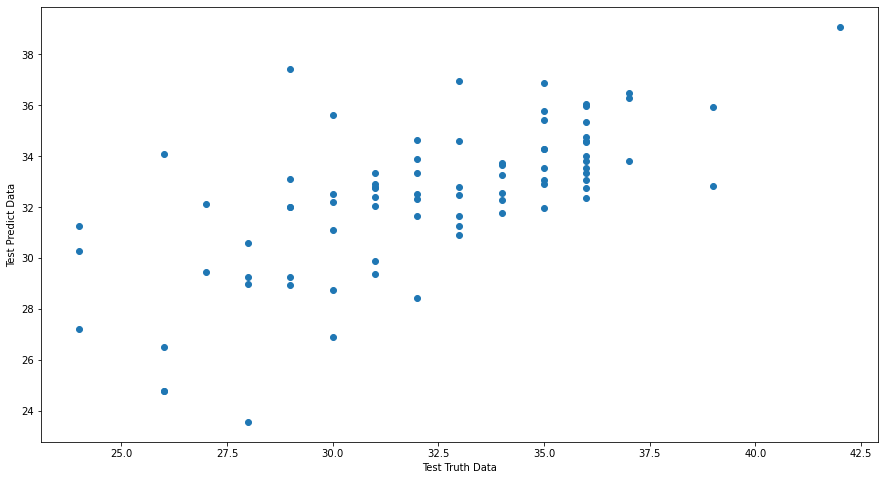

In [421]:
# relation between real and pred data
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [422]:
#calculate residuals
residual=y_test-reg_pred

In [423]:
residual

46    -2.994935
225   -4.126640
180    2.673708
116    1.216143
124   -0.246099
         ...   
127   -0.407145
241   -7.253617
207   -3.936925
102    3.092150
78     2.449601
Name: Temperature, Length: 81, dtype: float64

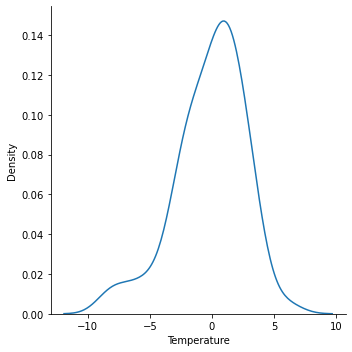

In [424]:
sns.displot(residual,kind='kde')

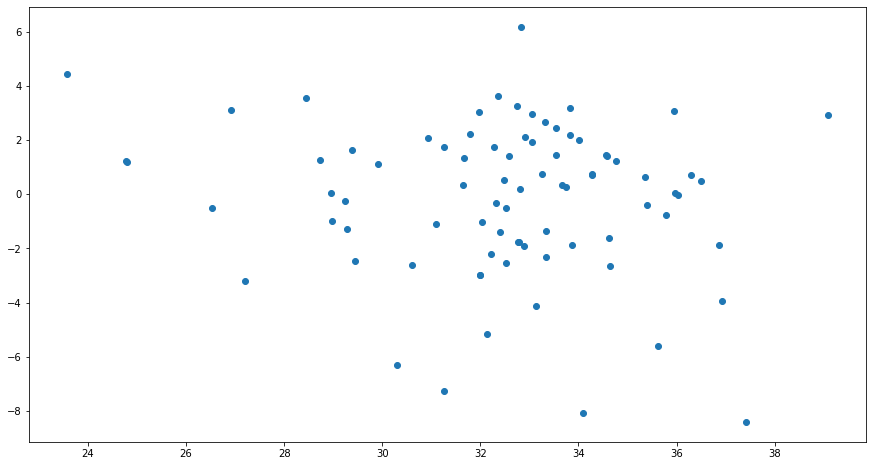

In [425]:
plt.scatter(reg_pred,residual)

# Performance metrics

In [426]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.7928584372969825
2.1532259595595913
2.7915691711467554


In [427]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.4370546969181548


In [428]:
## Adjusted R2 need to write 
adjR=1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjR)

0.4050971032934212


# Ridge regression 

In [429]:
from sklearn.linear_model import Ridge

In [430]:
ridge_reg=Ridge(alpha=1.0)

In [431]:
ridge_reg

Ridge()

In [432]:
ridge_reg.fit(X_train,y_train)

Ridge()

In [433]:
print(ridge_reg.coef_)

[-0.35498915 -0.22833494 -1.48029097 -0.70374866 -0.24661714  0.85405124
  0.08174868  0.64566072  0.07203342  0.17636996 -0.314502   -0.17870778
  0.22535392]


In [434]:
print(ridge_reg.intercept_)

32.074074074074076


In [435]:
rid_pred=ridge_reg.predict(X_test)
rid_pred

array([31.99412337, 33.12040196, 33.34904202, 24.81531826, 29.25317586,
       33.68676155, 31.63059048, 34.61400469, 31.81080916, 32.30710445,
       33.54409223, 33.34199846, 35.75695644, 32.03039126, 34.196428  ,
       33.27080718, 26.56260115, 35.93359951, 33.31573076, 23.60085512,
       32.31428709, 32.51199227, 33.06509029, 32.82454574, 29.89856284,
       32.75584864, 32.90298721, 32.1343128 , 31.97312855, 34.06519694,
       34.59717106, 33.86491378, 34.5259007 , 32.78015204, 31.23264081,
       28.7431667 , 32.55777417, 31.67069931, 33.05264996, 33.9776409 ,
       33.85967669, 35.60302534, 34.26796346, 37.35281757, 32.90360982,
       36.53560291, 32.26187897, 35.34292679, 30.59554534, 31.10728523,
       32.39611356, 39.09427765, 32.7429986 , 34.63335351, 27.23033441,
       36.89104824, 33.84982341, 33.71470698, 29.01228005, 32.45261276,
       32.52613462, 31.98628733, 24.81143025, 36.32031857, 36.06254441,
       28.98050626, 29.42546164, 29.37614081, 35.99109657, 28.46

Text(0, 0.5, 'Test Predict Data')

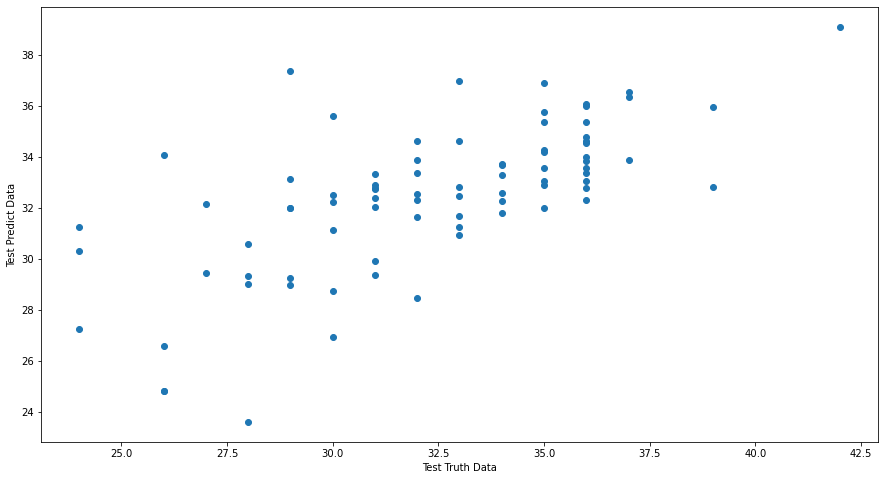

In [436]:
#reation between real and predict data
plt.scatter(y_test,rid_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [437]:
#calculate residuals
residual=y_test-rid_pred

In [438]:
residual

46    -2.994123
225   -4.120402
180    2.650958
116    1.184682
124   -0.253176
         ...   
127   -0.374756
241   -7.253492
207   -3.970100
102    3.073909
78     2.455105
Name: Temperature, Length: 81, dtype: float64

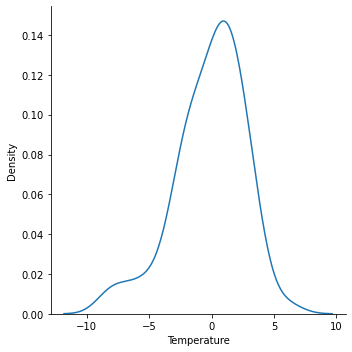

In [439]:
sns.displot(residual,kind='kde')

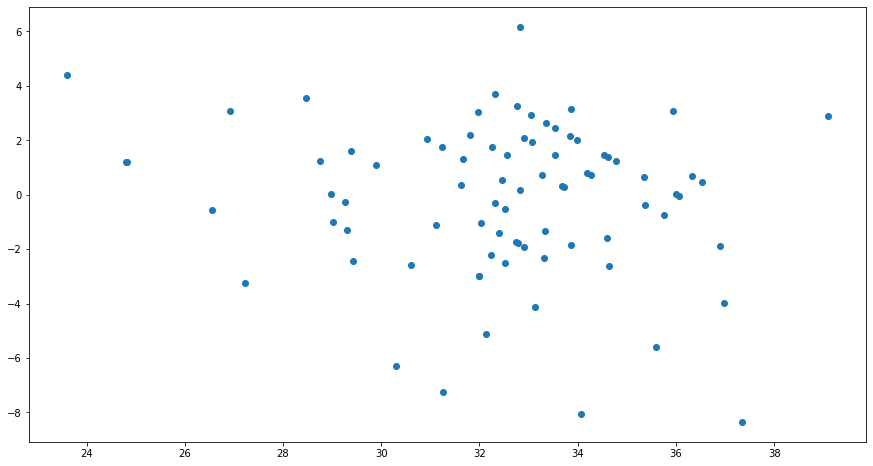

In [440]:
plt.scatter(rid_pred,residual)

# Performance metrics

In [441]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

7.770134748047858
2.151505587243574
2.7874961431449297


In [442]:
from sklearn.metrics import r2_score
score=r2_score(y_test,rid_pred)
print(score)

0.438696224765018


In [443]:
## Adjusted R2 need to write 
adjR=1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjR)

0.4068318183106303


# Lasso regression 

In [444]:
from sklearn.linear_model import Lasso

In [445]:
lasso=Lasso(alpha=0.1)

In [446]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [447]:
print(lasso.coef_)

[-0.105944   -0.0832839  -1.37409593 -0.63447767 -0.1567129   1.00625551
  0.14183148  0.32399062  0.          0.          0.         -0.05456468
  0.10290589]


In [448]:
print(lasso.intercept_)

32.074074074074076


In [449]:
Ls_pred=lasso.predict(X_test)

Text(0, 0.5, 'Test Predict Data')

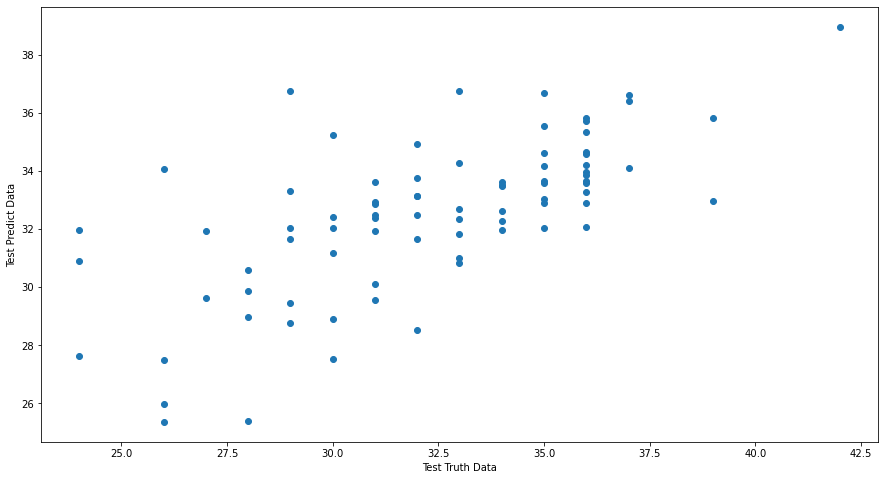

In [450]:
#reation between real and predict data
plt.scatter(y_test,Ls_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [451]:
#calculate residuals
residual=y_test-Ls_pred

In [452]:
residual

46    -3.049143
225   -4.302261
180    2.362682
116    0.022311
124    0.240150
         ...   
127    0.388053
241   -7.962346
207   -3.764752
102    2.464306
78     2.427680
Name: Temperature, Length: 81, dtype: float64

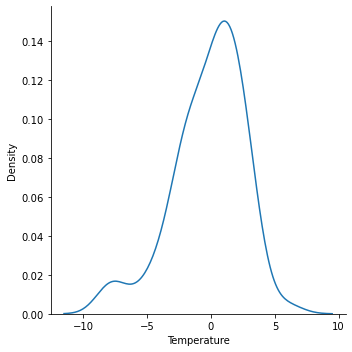

In [453]:
sns.displot(residual,kind='kde')

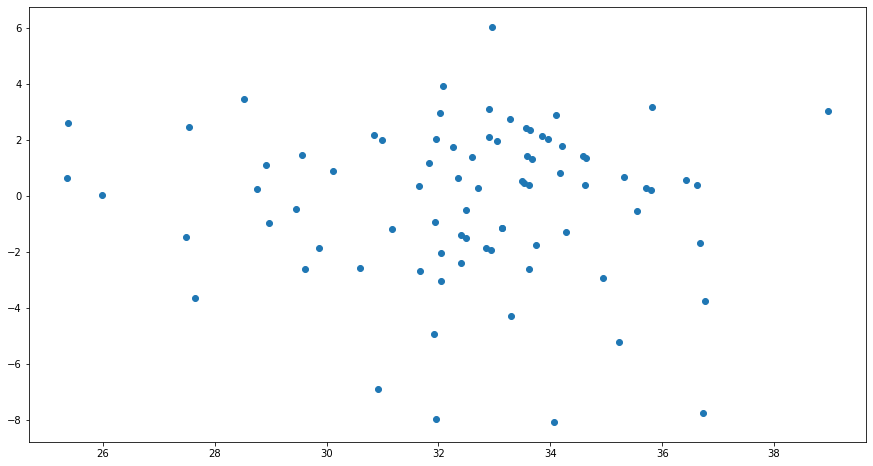

In [454]:
plt.scatter(Ls_pred,residual)

# Performance metrics

In [455]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,Ls_pred))
print(mean_absolute_error(y_test,Ls_pred))
print(np.sqrt(mean_squared_error(y_test,Ls_pred)))

7.615413002358264
2.1317374993041036
2.759603776334252


In [456]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Ls_pred)
print(score)

0.4498731094372349


In [457]:
## Adjusted R2 need to write 
adjR=1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjR)

0.41864319861926136


# Elastic net

In [458]:
from sklearn.linear_model import ElasticNet

In [459]:
el_reg=ElasticNet()

In [460]:
el_reg.fit(X_train,y_train)

ElasticNet()

In [461]:
print(el_reg.coef_)

[ 0.         -0.         -0.7730265  -0.26945253 -0.02396636  0.67644044
  0.10592038  0.          0.18367796  0.03890539  0.10736141 -0.12263291
  0.        ]


In [462]:
print(el_reg.intercept_)

32.074074074074076


In [463]:
el_pred=el_reg.predict(X_test)

Text(0, 0.5, 'Test Predict Data')

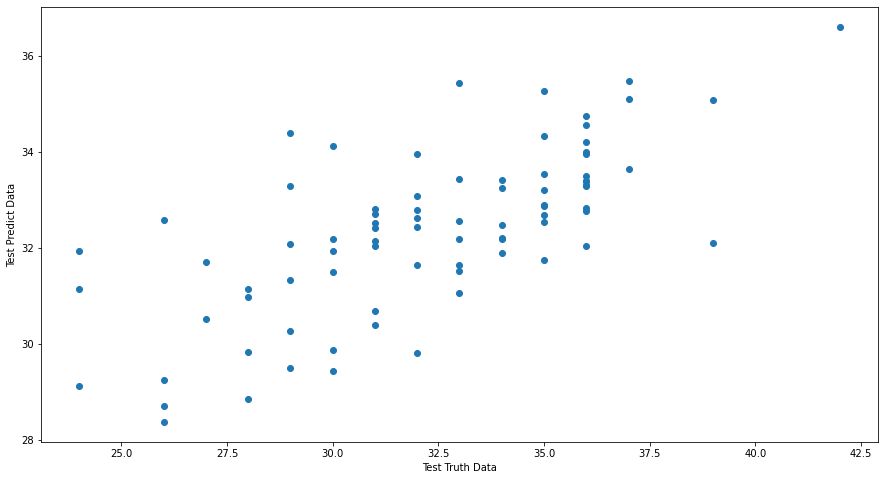

In [464]:
#reation between real and predict data
plt.scatter(y_test,el_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [465]:
#calculate residuals
residual=y_test-el_pred

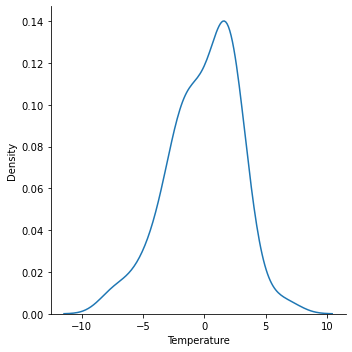

In [466]:
sns.displot(residual,kind='kde')

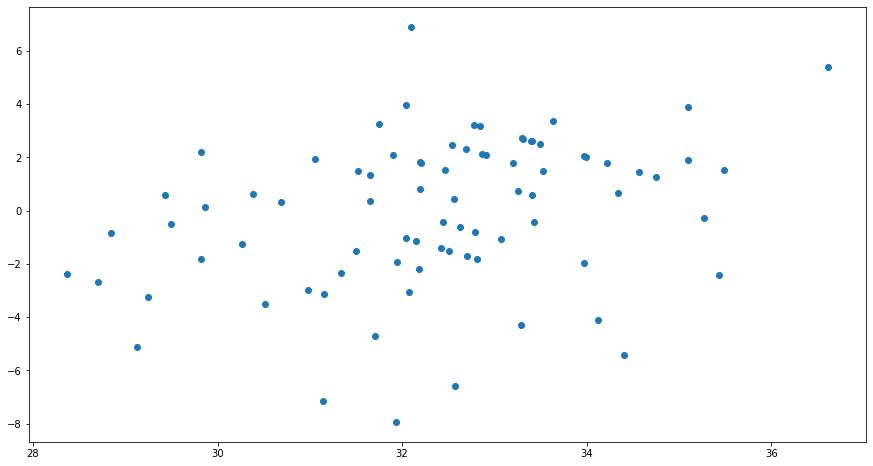

In [467]:
plt.scatter(el_pred,residual)

# Performance metrics

In [468]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,el_pred))
print(mean_absolute_error(y_test,el_pred))
print(np.sqrt(mean_squared_error(y_test,el_pred)))

7.915513754032116
2.286670095063569
2.8134522839444274


In [469]:
from sklearn.metrics import r2_score
score=r2_score(y_test,el_pred)
print(score)

0.4281942466726337


In [470]:
## Adjusted R2 need to write 
adjR=1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjR)

0.3957336580557963
